<a href="https://colab.research.google.com/github/AlexAlexeyuk/AlexAlexeyuk/blob/master/SMS_SPAM_HW6_Alexeyuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = full_df.iloc[:,:2]
df = df.rename(columns={"v1":"target", "v2":"text"})

In [199]:
df["text"] = df["text"].str.lower()
df.head()

,target,text
0,ham,"go until jurong point, crazy.. available only in bugis n great wor..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives around here though"


In [200]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,text,text_wo_punct
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [201]:
stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, \
you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, \
she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, \
themselves, what, which, who, whom, this, that, that'll, these, those, am, is,\
 are, was, were, be, been, being, have, has, had, having, do, does, did, doing,\
  a, an, the, and, but, if, or, because, as, until, while, of, at, by, for,\
   with, about, against, between, into, through, during, before, after, above,\
    below, to, from, up, down, in, out, on, off, over, under, again, further, \
    then, once, here, there, when, where, why, how, all, any, both, each, few,\
     more, most, other, some, such, no, nor, not, only, own, same, so, than, \
     too, very, s, t, can, will, just, don, don't, should, should've, now, d, \
     ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, \
     doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, \
     ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't,\
      shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn,\
       wouldn't"


In [202]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in \
                     stopwords])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text:\
                                               remove_stopwords(text))
df.head()

,target,text,text_wo_punct,text_wo_stop
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though


In [204]:
df.groupby("target").describe()

text  ... text_wo_stop
       count  ...         freq
target        ...             
ham     4825  ...           30
spam     747  ...            4

[2 rows x 12 columns]

In [207]:
df['target'] = df['target'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,target,text,text_wo_punct,text_wo_stop
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...


In [208]:
df['length'] = df['text_wo_stop'].apply(len)

In [209]:
df.head(10)

,target,text,text_wo_punct,text_wo_stop,length
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...,113
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102


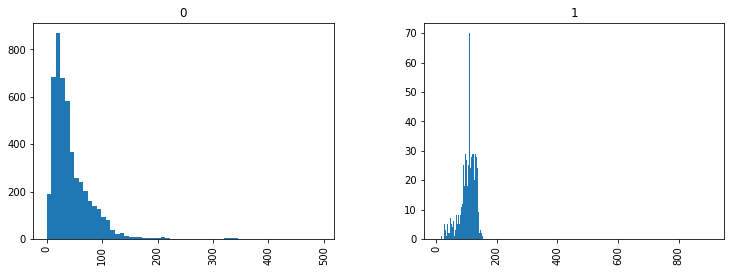

In [211]:
import matplotlib.pyplot as plt

df.hist(column='length',by='target',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [213]:
df_ham  = df[df['target'] == 0].copy()
df_spam = df[df['target'] == 1].copy()

In [214]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text_wo_stop'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

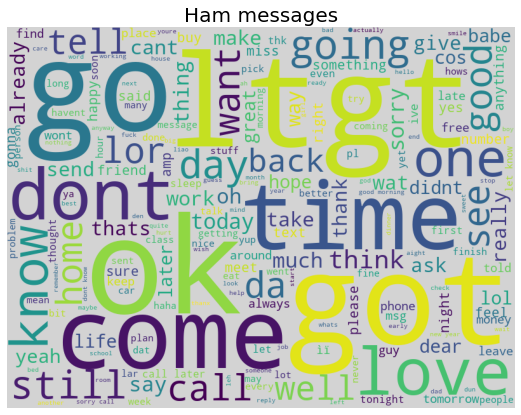

In [216]:
import wordcloud
show_wordcloud(df_ham, "Ham messages")

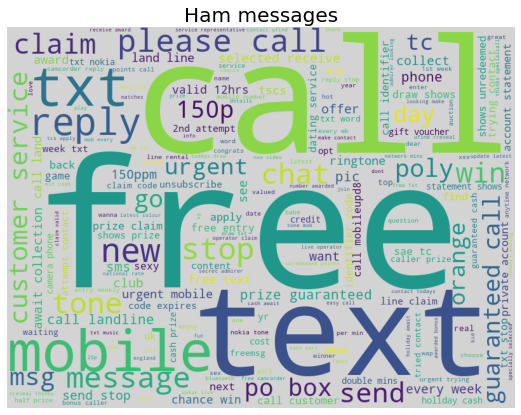

In [217]:
show_wordcloud(df_spam, "Ham messages")

In [218]:
from collections import Counter
cnt = Counter()
for text in df_ham["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('2', 305),
 ('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('dont', 257),
 ('go', 247),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229)]

In [220]:
cnt_ = Counter()
for text in df_spam["text_wo_stop"].values:
    for word in text.split():
        cnt_[word] += 1
        
cnt_.most_common(10)

[('call', 347),
 ('free', 216),
 ('2', 173),
 ('txt', 150),
 ('mobile', 123),
 ('text', 120),
 ('4', 119),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101)]

In [223]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_ham["text_stemmed"] = df_ham["text_wo_stop"].apply(lambda text: stem_words(text))
df_spam["text_stemmed"] = df_spam["text_wo_stop"].apply(lambda text: stem_words(text))
df_ham.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46,even brother like speak treat like aid patent


In [224]:
df_spam.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82,freemsg darl 3 week word back like fun still tb ok xxx std chg sen...
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122,winner valu network custom select receivea å£900 prize reward clai...
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102,mobil 11 month entitl updat latest colour mobil camera free call m...
11,1,"six chances to win cash! from 100 to 20,000 pounds txt> csh11 and ...",six chances to win cash from 100 to 20000 pounds txt csh11 and sen...,six chances win cash 100 20000 pounds txt csh11 send 87575 cost 15...,110,six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pd...


In [226]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_ham["text_lemmatized"] = df_ham["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_spam["text_lemmatized"] = df_spam["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_ham.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46,even brother like speak treat like aid patent,even brother like speak treat like aid patent


In [227]:
df_spam.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82,freemsg darl 3 week word back like fun still tb ok xxx std chg sen...,freemsg darling 3 week word back like fun still tb ok xxx std chgs...
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122,winner valu network custom select receivea å£900 prize reward clai...,winner valued network customer selected receivea å£900 prize rewar...
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102,mobil 11 month entitl updat latest colour mobil camera free call m...,mobile 11 month entitled update latest colour mobile camera free c...
11,1,"six chances to win cash! from 100 to 20,000 pounds txt> csh11 and ...",six chances to win cash from 100 to 20000 pounds txt csh11 and sen...,six chances win cash 100 20000 pounds txt csh11 send 87575 cost 15...,110,six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pd...,six chance win cash 100 20000 pound txt csh11 send 87575 cost 150p...


In [228]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_ham["text_lemmatized"] = df_ham["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_spam["text_lemmatized"] = df_spam["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_ham.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46,even brother like speak treat like aid patent,even brother like speak treat like aid patent


In [229]:
df_spam.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82,freemsg darl 3 week word back like fun still tb ok xxx std chg sen...,freemsg darling 3 week word back like fun still tb ok xxx std chgs...
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122,winner valu network custom select receivea å£900 prize reward clai...,winner value network customer select receivea å£900 prize reward c...
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102,mobil 11 month entitl updat latest colour mobil camera free call m...,mobile 11 month entitle update late colour mobile camera free call...
11,1,"six chances to win cash! from 100 to 20,000 pounds txt> csh11 and ...",six chances to win cash from 100 to 20000 pounds txt csh11 and sen...,six chances win cash 100 20000 pounds txt csh11 send 87575 cost 15...,110,six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pd...,six chance win cash 100 20000 pound txt csh11 send 87575 cost 150p...


In [232]:
#!pip install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 50 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_g9fdeq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.120 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [233]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OKMeansEstimator

In [234]:
def tokenize(sentences, stop_word = stopwords):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(stopwords)),:]
    return tokenized_words

In [244]:
spam = h2o.H2OFrame(df_spam, column_names=['target',	'text',
                          'text_wo_punct',	'text_wo_stop',
                        	'length',	'text_stemmed',
                          'text_lemmatized'],
                    column_types=["enum", "string", "string","string","string",\
                                  "string","string"])
ham = h2o.H2OFrame(df_ham, column_names=['target',	'text',
                          'text_wo_punct',	'text_wo_stop',
                        	'length',	'text_stemmed',
                          'text_lemmatized'],
                    column_types=["enum", "string", "string","string","string",\
                                  "string","string"])                    
                    

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [245]:
words_spam = tokenize(spam["text_lemmatized"])
words_ham = tokenize(ham["text_lemmatized"])

In [ ]:
words_ham.shape

In [247]:
print("Build word2vec model")
w2v_model_spam = H2OWord2vecEstimator(sent_sample_rate = 0.0, epochs = 10)
w2v_model_ham = H2OWord2vecEstimator(sent_sample_rate = 0.0, epochs = 10)
w2v_model_spam.train(training_frame=words_spam)
w2v_model_ham.train(training_frame=words_ham)

Build word2vec model
word2vec Model Build progress: |██████████████████████████████████████████| 100%
word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [248]:
spam_frame = w2v_model_spam.to_frame()
ham_frame = w2v_model_ham.to_frame()

In [249]:
X_spam = w2v_model_spam.transform(words_spam, aggregate_method = "AVERAGE")
X_ham = w2v_model_ham.transform(words_ham, aggregate_method = "AVERAGE")

In [ ]:
len(X_spam)

In [253]:
wrd_kmeans_spam = H2OKMeansEstimator(k=10,
                                 estimate_k=True,
                                 standardize=False,
                                 seed=1234)
wrd_kmeans_spam.train(training_frame=X_spam,
                  )

# Eval performance:
perf_spam = wrd_kmeans_spam.model_performance()

#  Generate predictions on a validation set (if necessary):
#pred = wr_kmeans.predict(valid)
perf_spam

kmeans Model Build progress: |████████████████████████████████████████████| 100%

ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 421.78973598597133
Total Sum of Square Error to Grand Mean: 1057.3968456788743
Between Cluster Sum of Square Error: 635.607109692903

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,77.0,46.604224
1,,2.0,17.0,1.714919
2,,3.0,41.0,34.720521
3,,4.0,211.0,116.874866
4,,5.0,77.0,39.496536
5,,6.0,13.0,9.000874
6,,7.0,116.0,57.927889
7,,8.0,68.0,52.572391
8,,9.0,70.0,33.731350
9,,10.0,57.0,29.146167


In [252]:
wrd_kmeans_ham = H2OKMeansEstimator(k=10,
                                 estimate_k=True,
                                 standardize=False,
                                 seed=1234)
wrd_kmeans_ham.train(training_frame=X_ham,
                  )

# Eval performance:
perf_ham = wrd_kmeans_ham.model_performance()

#  Generate predictions on a validation set (if necessary):
#pred = wr_kmeans.predict(valid)
perf_ham

kmeans Model Build progress: |████████████████████████████████████████████| 100%

ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 2745.3901502905246
Total Sum of Square Error to Grand Mean: 4338.75519884458
Between Cluster Sum of Square Error: 1593.3650485540556

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,170.0,113.702820
1,,2.0,668.0,398.820364
2,,3.0,143.0,138.350308
3,,4.0,638.0,341.611141
4,,5.0,125.0,133.968688
5,,6.0,1349.0,660.383182
6,,7.0,287.0,222.506248
7,,8.0,1125.0,530.363956
8,,9.0,320.0,205.683443


In [326]:
X_spam_pd = X_spam.as_data_frame()
X_ham_pd = X_ham.as_data_frame()


In [327]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [328]:
model_spam = PCA(n_components = 6)
model_ham = PCA(n_components = 6)

In [329]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
X_spam_pd = clean_dataset(X_spam_pd)
X_ham_pd = clean_dataset(X_ham_pd)

In [330]:
X_spam_pd = StandardScaler().fit(X_spam_pd).transform(X_spam_pd)
X_ham_pd = StandardScaler().fit(X_ham_pd).transform(X_ham_pd)

In [395]:
sil = []
kmax = 12
for k in range(2, kmax+1):
  kmeans_spam_ = KMeans(n_clusters = k).fit(X_spam_pd)
  labels_spam = kmeans_spam_.labels_
  sil.append(silhouette_score(X_spam_pd, labels_spam, metric = 'euclidean'))
        
maxpos = sil.index(max(sil))
n_clusters = maxpos + 2
maxpos


5

In [ ]:
kmeans_spam_ = KMeans(n_clusters = 5).fit(X_spam_pd)


In [397]:
len(kmeans_spam_.labels_)

745

In [331]:
results_spam = model_spam.fit(X_spam_pd) 
results_ham = model_ham.fit(X_ham_pd) 
print(results_spam, results_ham)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [332]:
Z_spam = results_spam.transform(X_spam_pd) 
Z_ham = results_ham.transform(X_ham_pd)

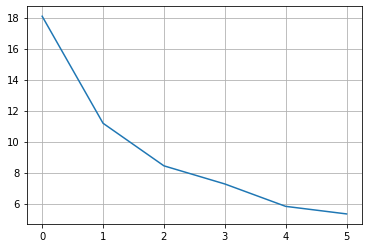

In [333]:
plt.plot(results_ham.explained_variance_)#график каменистой осыпи
plt.grid()
plt.show()

Значит у фрейма "хам" есть около 6 главных компонент


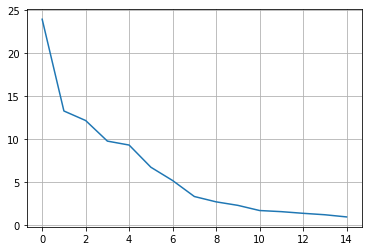

In [323]:
plt.plot(results_spam.explained_variance_)#график каменистой осыпи
plt.grid()
plt.show()

In [343]:
LV_spam=pd.DataFrame(results_spam.components_)
LV_ham=pd.DataFrame(results_ham.components_)
LV_spam.shape

(6, 100)

In [370]:
kmeans_spam = KMeans(n_clusters = 5).fit(LV_spam)
labels_spam = kmeans_spam.labels_
print(silhouette_score(LV_spam, labels_spam, metric = 'euclidean'))

2.616820764472959e-17


In [367]:
sil_ham = []
kmax = 5
for k in range(2, kmax+1):
   kmeans_ham = KMeans(n_clusters = k).fit(LV_ham)
   labels_ham = kmeans_ham.labels_
   sil_ham.append(silhouette_score(LV_ham, labels_ham, metric = 'euclidean'))
   print( silhouette_score(LV_ham, labels_ham, metric = 'euclidean'))
maxpos_ham = sil_ham.index(max(sil_ham))
n_clusters_ham = maxpos + 2
maxpos_ham

4.1869132231567344e-16
1.8317745351310725e-16
2.0934566115783685e-16
2.6168207644729615e-17


0

In [372]:
kmeans_ham = KMeans(n_clusters = k).fit(LV_ham)

In [377]:
LV_ham.T.shape

(100, 6)

In [374]:
len(kmeans_ham.labels_)

6

In [ ]:
results_spam = model_spam.fit(X_spam_pd) 
results_ham = model_ham.fit(X_ham_pd) 
print(results_spam, results_ham)

In [ ]:
sil = []
kmax = 10
for k in range(2, kmax+1):
   kmeans_spam = KMeans(n_clusters = k).fit(X_spam)
   labels = kmeans_spam.labels_
   sil.append(silhouette_score(X_spam, labels, metric = 'euclidean'))
        
maxpos = sil.index(max(sil))
n_clusters = maxpos + 2

In [260]:
X_spam_stand = StandardScaler().fit(X_spam).transform(X_spam)
X_ham_stand = StandardScaler().fit(X_ham).transform(X_ham)

ValueError: ignored

In [ ]:
# Z

In [ ]:
#Z = Z.as_data_frame()

In [ ]:
#Z = pd.DataFrame(Z)
#Z = Z.iloc[:,1:]

In [ ]:
#Z.head()

In [ ]:
#Z.shape

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [ ]:
wrd_kmeans.centers

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Divide into k groups using k-mean clustering
"""model = KMeans(n_clusters=n_clusters, init='k-means++',
               max_iter=300, n_init=100)
model.fit(Z)
    
# Create group label column
clusters = model.labels_
clusters"""

array([1, 8, 1, 3, 3, 3, 8, 2, 0, 1, 7, 6, 2, 0, 7, 5, 7, 4, 4, 0, 8, 0,
       7, 1, 0, 7, 6, 4, 7, 3, 4, 5, 1, 7, 1, 2, 0, 8, 5, 4, 4, 1, 8, 3,
       4, 5, 0, 2, 0, 1, 1, 6, 5, 5, 6, 5, 2, 6, 3, 2, 4, 4, 8, 3, 0, 5,
       7, 2, 1, 1, 6, 7, 1, 8, 3, 3, 5, 3, 3, 4, 3, 4, 1, 5, 1, 0, 0, 2,
       8, 6, 8, 1, 4, 3, 5, 5, 3, 1, 3, 5], dtype=int32)